# Zestaw zadań: Kwadratury adaptacyjne
## Zadanie 1,2
### Autor: Artur Gęsiarz

In [691]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad_vec

### Funkcja podcalkowa dla zadania 1

In [692]:
def f(x):
    return 4 / (1 + x ** 2)

### Funkcja obliczajaca calke metoda trapezow z podana toleraancja

In [693]:
def adaptive_trapezoidal_integration(a, b, tol):
    integral, err, info = quad_vec(f, a, b, epsabs=tol,quadrature='trapezoid', full_output=True)
    return integral, info.neval

### Funkcja obliczajca calke metoda Gaussa-Kronroda z podana tolerancja

In [694]:
def adaptive_gauss_kronrod_integration(a, b, tol):
    integral, err, info = quad_vec(f, a, b,epsabs=tol, full_output=True)
    return integral, info.neval

### Prawdziwa wartosc calki

In [695]:
exact_value = np.pi

### Zakres tolerancji

In [696]:
tolerances = np.logspace(0, -14, num=15)

### Przedzial calkowania

In [697]:
a = 0
b = 1

### Blad wzgledny dla obu metod

In [698]:
errors_trap = []
errors_gauss_kronrod = []

### Liczba ewaluacji obu metod

In [699]:
evals_trap = []
evals_gauss_kronrod = []

### Przejscie po wszystkich toleranacjach i obliczenie bledu

In [700]:
for tol in tolerances:
    integrate_trap, neval_trap = adaptive_trapezoidal_integration(a, b, tol)
    integrate_gauss_kronrod, neval_gauss_kronrod = adaptive_gauss_kronrod_integration(a, b, tol)

    error_trap = np.abs(integrate_trap - exact_value) / exact_value
    error_gauss_kronrod = np.abs(integrate_gauss_kronrod - exact_value) / exact_value

    errors_trap.append(error_trap)
    errors_gauss_kronrod.append(error_gauss_kronrod)

    evals_trap.append(neval_trap)
    evals_gauss_kronrod.append(neval_gauss_kronrod)


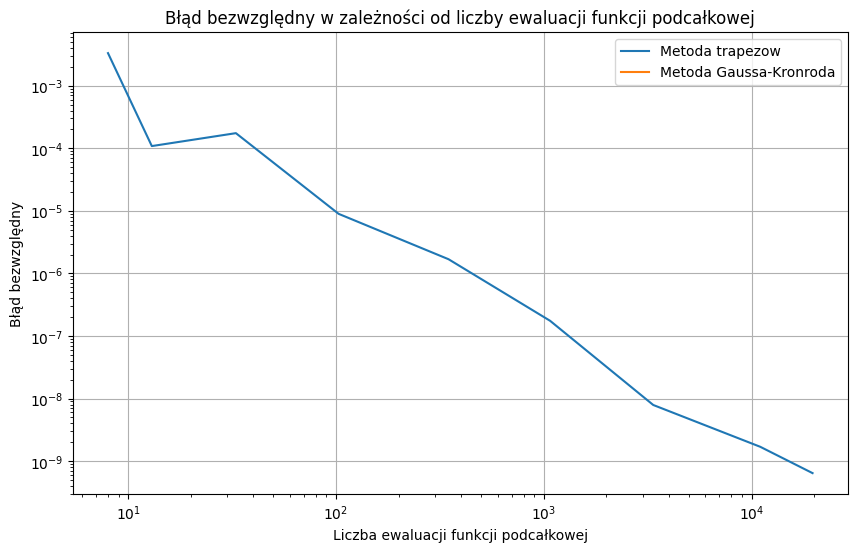

In [701]:
plt.figure(figsize=(10, 6))
plt.semilogy(evals_trap, errors_trap, label='Metoda trapezow')
plt.semilogy(evals_gauss_kronrod, errors_gauss_kronrod, label='Metoda Gaussa-Kronroda')
plt.title('Błąd bezwzględny w zależności od liczby ewaluacji funkcji podcałkowej')
plt.xlabel('Liczba ewaluacji funkcji podcałkowej')
plt.ylabel('Błąd bezwzględny')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()

### Funkcje podcalkowe dla zadania 2

#### a)

In [ ]:
def f2_a(x):
    return np.sqrt(x) * np.log(x)

#### b)

In [ ]:
def f2_b(x, a = 0.001, b = 0.004):
    return 1 / ((x - 0.3) ** 2 + a) + 1 / ((x - 0.9) ** 2 + b) - 6